In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf
%matplotlib inline

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving delivery_time.csv to delivery_time.csv


In [ ]:
data=pd.read_csv('delivery_time.csv')

In [ ]:
data

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [ ]:
data.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


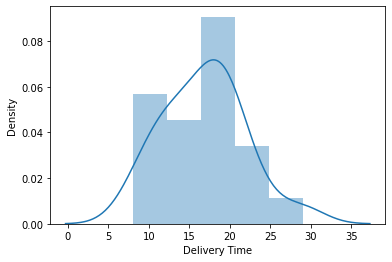

In [ ]:
sns.distplot(data['Delivery Time'])

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


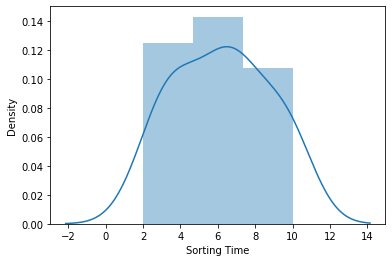

In [ ]:
sns.distplot(data['Sorting Time'])

In [ ]:
data=data.rename({'Delivery Time':'delivery_time','Sorting Time':'sorting_time'},axis=1)
data

,delivery_time,sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


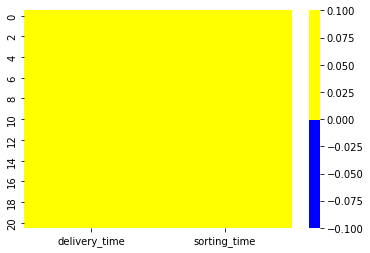

In [ ]:
cols=data.columns
colours=['blue','yellow']
sns.heatmap(data[cols].isnull(),
cmap=sns.color_palette(colours))

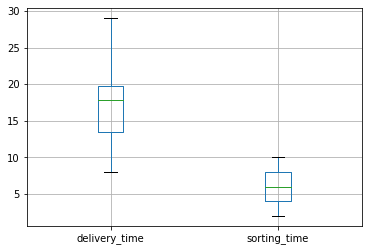

In [ ]:
data.boxplot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc01ca05d30>,
      dtype=object)

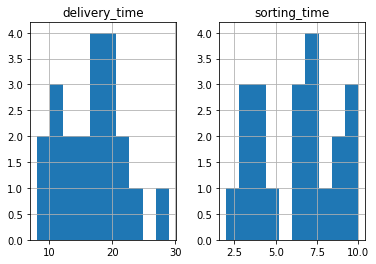

In [ ]:
data.hist()

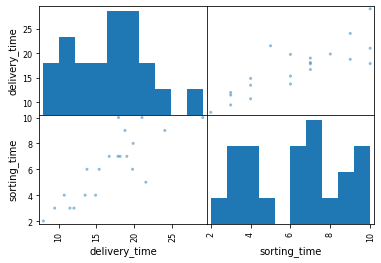

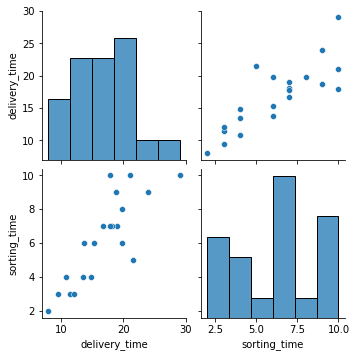

In [ ]:
pd.plotting.scatter_matrix(data)
sns.pairplot(data)

In [ ]:
data.corr()

,delivery_time,sorting_time
delivery_time,1.000000,0.825997
sorting_time,0.825997,1.000000


In [ ]:
data=pd.get_dummies(data)
data

,delivery_time,sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [ ]:
from numpy import set_printoptions
from sklearn.preprocessing import MinMaxScaler

In [ ]:
data.values

array([[21.  , 10.  ],
       [13.5 ,  4.  ],
       [19.75,  6.  ],
       [24.  ,  9.  ],
       [29.  , 10.  ],
       [15.35,  6.  ],
       [19.  ,  7.  ],
       [ 9.5 ,  3.  ],
       [17.9 , 10.  ],
       [18.75,  9.  ],
       [19.83,  8.  ],
       [10.75,  4.  ],
       [16.68,  7.  ],
       [11.5 ,  3.  ],
       [12.03,  3.  ],
       [14.88,  4.  ],
       [13.75,  6.  ],
       [18.11,  7.  ],
       [ 8.  ,  2.  ],
       [17.83,  7.  ],
       [21.5 ,  5.  ]])

In [ ]:
array=data.values
scaler=MinMaxScaler(feature_range=(0,1))
rescaledX=scaler.fit_transform(array)

In [ ]:
set_printoptions(precision=2)
print(rescaledX[0:5,:])

[[0.62 1.  ]
 [0.26 0.25]
 [0.56 0.5 ]
 [0.76 0.88]
 [1.   1.  ]]


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
array=data.values
scaler=StandardScaler()
scaler.fit(array)
rescaledX=scaler.transform(array)

In [ ]:
set_printoptions(precision=2)
print(rescaledX[0:5,:])

[[ 0.85  1.54]
 [-0.66 -0.88]
 [ 0.6  -0.08]
 [ 1.46  1.13]
 [ 2.47  1.54]]


In [ ]:
data_log=np.log(data)
data

,delivery_time,sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [ ]:
data_log=np.sqrt(data)
data

,delivery_time,sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


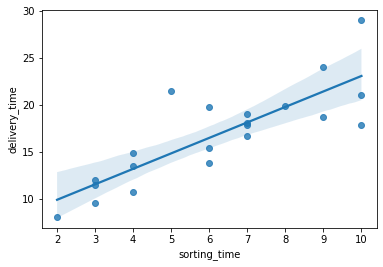

In [ ]:
sns.regplot(x=data['sorting_time'],y=data['delivery_time'])

In [ ]:
model=smf.ols("delivery_time~sorting_time",data=data).fit()

In [ ]:
model.params

Intercept       6.582734
sorting_time    1.649020
dtype: float64

In [ ]:
model.tvalues,model.pvalues

(Intercept       3.823349
 sorting_time    6.387447
 dtype: float64, Intercept       0.001147
 sorting_time    0.000004
 dtype: float64)

In [ ]:
model.rsquared,model.rsquared_adj

(0.6822714748417231, 0.6655489208860244)

In [ ]:
new_data=pd.Series([10,4,6,9,10,6,7,3,10,9,8,4,7,3,3,4,6,7,2,7,5])
new_data

0     10
1      4
2      6
3      9
4     10
5      6
6      7
7      3
8     10
9      9
10     8
11     4
12     7
13     3
14     3
15     4
16     6
17     7
18     2
19     7
20     5
dtype: int64

In [ ]:
data_pred=pd.DataFrame(new_data,columns=['sorting_time'])
data_pred

,sorting_time
0,10
1,4
2,6
3,9
4,10
5,6
6,7
7,3
8,10
9,9


In [ ]:
model.predict(data_pred)

0     23.072933
1     13.178814
2     16.476853
3     21.423913
4     23.072933
5     16.476853
6     18.125873
7     11.529794
8     23.072933
9     21.423913
10    19.774893
11    13.178814
12    18.125873
13    11.529794
14    11.529794
15    13.178814
16    16.476853
17    18.125873
18     9.880774
19    18.125873
20    14.827833
dtype: float64

Q2

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving Salary_Data.csv to Salary_Data.csv


In [ ]:
data=pd.read_csv('Salary_Data.csv')

In [ ]:
data

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [ ]:
data.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


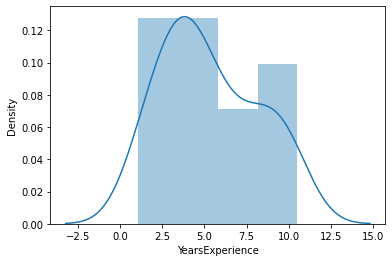

In [ ]:
sns.distplot(data['YearsExperience'])

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


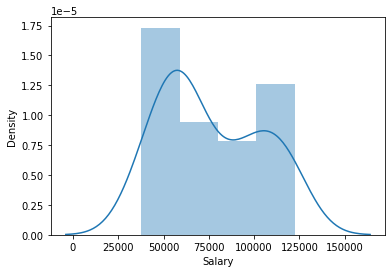

In [ ]:
sns.distplot(data['Salary'])

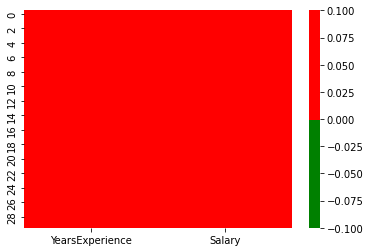

In [ ]:
cols=data.columns
colours=['green','red']
sns.heatmap(data[cols].isnull(),
            cmap=sns.color_palette(colours))

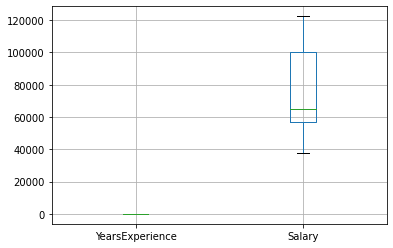

In [ ]:
data.boxplot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc01b85c880>,
      dtype=object)

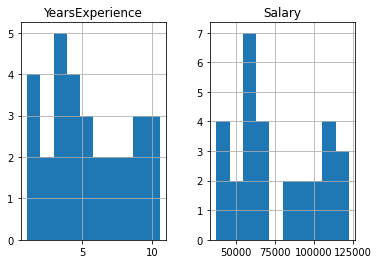

In [ ]:
data.hist()

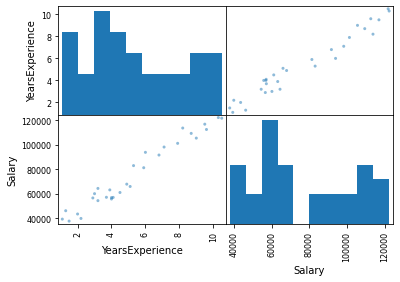

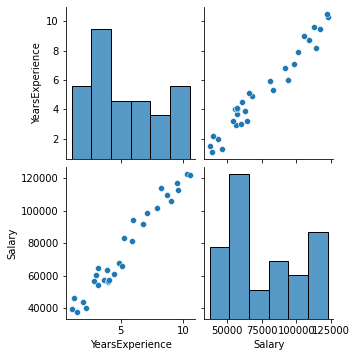

In [ ]:
pd.plotting.scatter_matrix(data)
sns.pairplot(data)

In [ ]:
data.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


In [ ]:
data=pd.get_dummies(data)
data

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [ ]:
from numpy import set_printoptions
from sklearn.preprocessing import MinMaxScaler

In [ ]:
data.values

array([[1.10e+00, 3.93e+04],
       [1.30e+00, 4.62e+04],
       [1.50e+00, 3.77e+04],
       [2.00e+00, 4.35e+04],
       [2.20e+00, 3.99e+04],
       [2.90e+00, 5.66e+04],
       [3.00e+00, 6.02e+04],
       [3.20e+00, 5.44e+04],
       [3.20e+00, 6.44e+04],
       [3.70e+00, 5.72e+04],
       [3.90e+00, 6.32e+04],
       [4.00e+00, 5.58e+04],
       [4.00e+00, 5.70e+04],
       [4.10e+00, 5.71e+04],
       [4.50e+00, 6.11e+04],
       [4.90e+00, 6.79e+04],
       [5.10e+00, 6.60e+04],
       [5.30e+00, 8.31e+04],
       [5.90e+00, 8.14e+04],
       [6.00e+00, 9.39e+04],
       [6.80e+00, 9.17e+04],
       [7.10e+00, 9.83e+04],
       [7.90e+00, 1.01e+05],
       [8.20e+00, 1.14e+05],
       [8.70e+00, 1.09e+05],
       [9.00e+00, 1.06e+05],
       [9.50e+00, 1.17e+05],
       [9.60e+00, 1.13e+05],
       [1.03e+01, 1.22e+05],
       [1.05e+01, 1.22e+05]])

In [ ]:
array=data.values
scaler=MinMaxScaler(feature_range=(0,1))
rescaledX=scaler.fit_transform(array)
set_printoptions(precision=2)
print(rescaledX[0:5,:])

[[0.   0.02]
 [0.02 0.1 ]
 [0.04 0.  ]
 [0.1  0.07]
 [0.12 0.03]]


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
array=data.values
scaler=StandardScaler()
scaler.fit(array)
rescaledX=scaler.transform(array)
set_printoptions(precision=2)
print(rescaledX[0:5,:])

[[-1.51 -1.36]
 [-1.44 -1.11]
 [-1.37 -1.42]
 [-1.19 -1.2 ]
 [-1.12 -1.34]]


In [ ]:
data_log=np.log(data)
data

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [ ]:
data_log=np.sqrt(data)
data

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


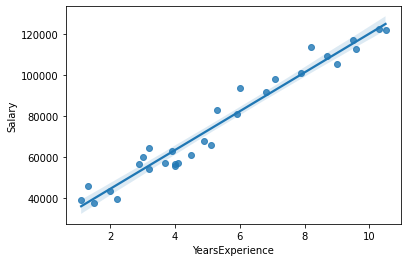

In [ ]:
sns.regplot(x=data['YearsExperience'],y=data['Salary'])

In [ ]:
model=smf.ols('Salary~YearsExperience',data=data).fit()

In [ ]:
model.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [ ]:
model.rsquared,model.rsquared_adj

(0.9569566641435086, 0.9554194021486339)

In [ ]:
new_data=pd.Series([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29])
new_data

0      0
1      1
2      2
3      3
4      4
5      5
6      6
7      7
8      8
9      9
10    10
11    11
12    12
13    13
14    14
15    15
16    16
17    17
18    18
19    19
20    20
21    21
22    22
23    23
24    24
25    25
26    26
27    27
28    28
29    29
dtype: int64

In [ ]:
data_pred=pd.DataFrame(new_data,columns=['YearsExperience'])
data_pred

,YearsExperience
0,0
1,1
2,2
3,3
4,4
5,5
6,6
7,7
8,8
9,9


In [ ]:
model.predict(data_pred)

0      25792.200199
1      35242.162520
2      44692.124842
3      54142.087163
4      63592.049484
5      73042.011806
6      82491.974127
7      91941.936449
8     101391.898770
9     110841.861092
10    120291.823413
11    129741.785735
12    139191.748056
13    148641.710378
14    158091.672699
15    167541.635020
16    176991.597342
17    186441.559663
18    195891.521985
19    205341.484306
20    214791.446628
21    224241.408949
22    233691.371271
23    243141.333592
24    252591.295914
25    262041.258235
26    271491.220557
27    280941.182878
28    290391.145199
29    299841.107521
dtype: float64